<a href="https://colab.research.google.com/github/Gabriellemga/Python_Cursos_Alura/blob/main/Numpy_analise_numerica_com_Python/Desafio_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O dataset utilizado para esse desafio é uma versão modificada do arquivo presente no Kaggle:
https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

O link do arquivo raw que vamos usar (aquele usamos para ler direto do Github) é esse aqui:
https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv

# Leitura dos dados

Se você clicar no link verá que temos um arquivo com 6 colunas, sendo a primeira coluna do arquivo uma coluna de texto e a primeira linha do arquivo também é uma coluna de texto.

Aqui o desafio é ler esse arquivo. Para isso importe a numpy e use a função loadtxt. Use o link da url, o parâmetro usecols para pular a primeira coluna. Você pode usar np.arange para criar a sequência de números que representam as colunas. Por fim, você também deve incluir o parâmetro skiprows=1 para que a primeira linha de texto seja desconsiderada na leitura do arquivo.

In [5]:
import numpy as np
url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'
dados = np.loadtxt(url, delimiter=',',usecols=np.arange(1,6,1),skiprows=1)

In [6]:
dados

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

# Seleção de dados

Desses a colunas que iremos avaliar são as de diâmetro e peso. Crie um arrays específicos para guardar o diâmetro e peso da laranja e toranja. O diâmtro está na coluna zero e o peso na coluna 1. Os dados referentes a laranja vão até a linha 4999 e os referentes à toranja iniciam na linha 5000 do arquivo.

In [7]:
diametro = dados[:,0]
peso = dados[:,1]

diametro_laranja = diametro[:5000]
peso_laranja = peso[:5000]
diametro_toranja = diametro[5000:]
peso_toranja = peso[5000:]

# Visualização de dados

Importe a biblioteca matplotlib e crie um gráfico separado para a laranja e outro para a toranja do peso pelo diâmetro.

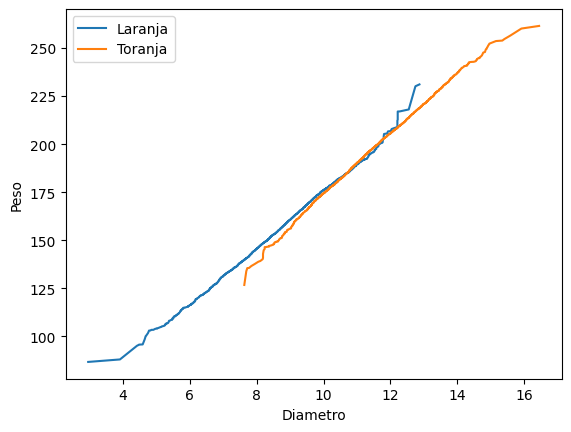

In [9]:
import matplotlib.pyplot as plt

plt.plot(diametro_laranja,peso_laranja)
plt.plot(diametro_toranja,peso_toranja)
plt.legend(['Laranja','Toranja'])
plt.xlabel('Diametro')
plt.ylabel('Peso')
plt.show()

# O coeficiente das retas

As duas parecem ter uma inclinação muito parecida em uma primeira inspeção visual vamos determinar os coeficientes da reta para cada um dos casos.

Lembre que para o coeficiente angular precisamos implementar a função:
$$ \hat{a} = \frac{n*Soma( X_i*Y_i ) - Soma( X_i )*Soma(Y_i)}{n Soma(X_i^2) - (Soma(X_i))^2}$$

e para o coeficiente linear:
$$ \hat{b} = Media(Y_i) - \hat{a} * Media(X_i) $$


Perceba que nesse caso o X é o diâmtro e o Y é o peso. Além disso o n é o número de elementos dentro do X, por exemplo.Ele vai ser diferente para a laranja e toranja. Determine o coefiecente para cada caso:

In [10]:
Y = peso_laranja
X = diametro_laranja
n = np.size(X)

In [11]:
a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2)-np.sum(X)**2)
a

np.float64(14.7997452319846)

In [12]:
b = np.mean(Y) - a*np.mean(X)
b

np.float64(27.38560381218413)

In [13]:
Y = peso_toranja
X = diametro_toranja
n = np.size(X)

In [14]:
a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2)-np.sum(X)**2)
a

np.float64(15.70884459360376)

In [15]:
b = np.mean(Y) - a*np.mean(X)
b

np.float64(17.007102876817726)

Se deu tudo você deve ter chegado em valores diferentes para cada um dos casos. Então, embora a inclinação da reta seja parecida nós descobrimos que os coeficientes da reta servem como uma forma de diferenciar se as frutas são laranjas ou toranjas.

# Estimando através de números aleatórios

Agora ao invés de usar a fórmula fechada utilize a np.random.uniform para gerar valores aleatórios para determinar o coeficiente angular da toranja. Nesse caso vamos assumir que b é igual a 17. Utilize o random.seed(84).

In [ ]:
b =17

In [ ]:
norma = np.array([])
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.0,high=30.0,size=100)

for i in range(100):
  norma = np.append(norma,np.linalg.norm(Y- (coef_angulares[i]*X+b)))

In [ ]:
norma

array([11693.67355856,  3756.21335179,  6888.14382259,  2567.04685515,
       11420.77932891,  9623.66917996,  8570.85655292,  6496.51679273,
        2577.28271294,  9613.12064833,  5709.72883857,   695.35964734,
       10855.07029288,  5539.82389583,  3137.98293399,   296.30778902,
        8896.93668493,  8347.82090288, 10206.95670568, 10229.7542583 ,
        2193.54863897,  8448.39951623, 11004.80458021, 11563.3388543 ,
        4098.18752189,  7732.70842098,  2801.84736004,  7688.60780777,
       11134.73586307,  9432.12778879,   725.4664674 ,  6290.36141277,
        5189.67184491,  4716.99608173,  9250.47142251,  7274.49676931,
        8876.20611799,   621.16747277,  4716.1854569 ,  8050.51001798,
        9238.31227388,  3992.98429323, 11531.1764187 ,  5849.11139809,
        1042.57303406,  9875.3710071 , 11759.24152592,  8956.15615033,
        2219.50808351,  3585.49846047, 11347.59016791,  2477.87811921,
         878.91891293,  2740.88025627,  1766.171738  ,   710.47076735,
      


Se deu tudo certo a menor norma que você alcançou foi 104.40529157196431.

In [ ]:
np.min(norma)

104.40529157196431

Algo que não foi passado no curso é que também podemos utilizar condições dentro dos colchetes dos arrays para encontrar um determinado valor. O código abaixo mostra o coeficiente angular que corresponde ao menor valor da norma. Repare que a condição é a: norma == np.min(norma).

In [ ]:
coef_angulares[norma == np.min(norma)]

array([15.82512199])

# Parabéns por ter chegado até aqui.

https://media.giphy.com/media/l2JJHEW1lToNnJzxe/giphy.gif